<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ исходных данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Лемматизация-и-очистка-данных" data-toc-modified-id="Лемматизация-и-очистка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Лемматизация и очистка данных</a></span></li><li><span><a href="#Разбиение-выборок-на-обучающую,-тестовую-и-валидационную" data-toc-modified-id="Разбиение-выборок-на-обучающую,-тестовую-и-валидационную-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Разбиение выборок на обучающую, тестовую и валидационную</a></span></li><li><span><a href="#Стоп-слова-и-векторизация-текста" data-toc-modified-id="Стоп-слова-и-векторизация-текста-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Стоп-слова и векторизация текста</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект для «Викишоп»

## Описание проекта

Для выполнения данного проекта, мы должны разработать модель классификации комментариев на позитивные и негативные. Это позволит интернет-магазину «Викишоп» автоматически искать токсичные комментарии, отправлять их на модерацию и обеспечивать безопасность вики-сообщества.

Ход выполнения проекта:
1. Загрузка и подготовка данных:
   - Необходимо загрузить набор данных, который содержит описания товаров с разметкой о токсичности правок.
   - Далее провести предобработку данных, включающую удаление лишних символов, токенизацию текста и приведение его к нижнему регистру.
   - Разделить данные на обучающую, тестовую и валидационную выборки.

2. Обучение разных моделей:
   - Построить различные алгоритмы машинного обучения, такие как логистическая регрессия, случайный лес, градиентный бустинг и др.
   - Важно использовать оптимальные гиперпараметры для каждой модели.
   - Метрика качества F1 должна быть не менее 0.75.

3. Выводы:
   - После обучения разных моделей, необходимо оценить их производительность на тестовой выборке.
   - Выбрать модель с наилучшей метрикой качества F1 и применить ее для классификации комментариев в реальном времени.
   - Модель должна обнаруживать токсичные комментарии и отправлять их на модерацию, чтобы обеспечить безопасность и качество описаний товаров в интернет-магазине «Викишоп».


## Описание данных

Столбец `text` в нём содержит текст комментария, а `toxic` — целевой признак.

## Подготовка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from pymystem3 import Mystem
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, make_scorer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

RANDOM_SEED = np.random.RandomState(5081997)
CV = 3

## Анализ исходных данных

In [4]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('toxic_comments.csv')
    
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
data.head(5)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [7]:
data['toxic'].value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

В данных наблюдается дисбаланс классов. Положительные комментраии составляют 90%, а негативные всего 10%. Будем это учитывать при построении моделей

## Предобработка данных
### Лемматизация и очистка данных

In [8]:
# функция для очистки текста
def clear_text(text):
    text = text.lower()
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    return "".join(clear_text)

# очистим текст
data['text'] = data['text'].apply(clear_text)

In [9]:
%%time
lemmatizer = WordNetLemmatizer()

# загрузка POS-тегов из nltk.corpus
tag_map = {
    'N': wordnet.NOUN,
    'V': wordnet.VERB,
    'R': wordnet.ADV,
    'J': wordnet.ADJ
}

# функция для лемматизации по POS-тегу
def lemmatize_word(word, tag):
    # проверка наличия POS-тега в tag_map
    if tag in tag_map.keys():
        return lemmatizer.lemmatize(word, tag_map[tag])
    else:
        return lemmatizer.lemmatize(word)

# токенизация текстовых значений в столбце 'text'
data['tokenized'] = data['text'].apply(nltk.word_tokenize)

# получение POS-тегов для каждого токена в столбце 'tokenized' с помощью nltk.pos_tag()
data['pos_tags'] = data['tokenized'].apply(nltk.pos_tag)

# применяем WordNetLemmatizer к каждому токену с соответствующим POS-тегом
data['text'] = data['pos_tags'].apply(lambda tokens: " ".join([lemmatize_word(token, tag) for token, tag in tokens]))
data = data.drop(columns=['tokenized', 'pos_tags'])

CPU times: user 8min 4s, sys: 5.77 s, total: 8min 10s
Wall time: 8min 10s


### Разбиение выборок на обучающую, тестовую и валидационную

In [10]:
# выделим признаки и таргет
X = data.drop(columns=['toxic'])
y = data['toxic']

# разобьем выборки с соотношении 70/15/15
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=RANDOM_SEED)

In [11]:
data

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he match this background colour i m seem...,0
2,hey man i m really not trying to edit war it s...,0
3,more i can t make any real suggestion on impro...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
159287,and for the second time of asking when your vi...,0
159288,you should be ashamed of yourself that is a ho...,0
159289,spitzer umm there no actual article for prosti...,0
159290,and it look like it wa actually you who put on...,0


### Стоп-слова и векторизация текста

In [12]:
# выделим стоп-слова
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords)

X_train = count_tf_idf.fit_transform(X_train['text'].values)
X_val = count_tf_idf.transform(X_val['text'].values)
X_test = count_tf_idf.transform(X_test['text'].values)

print('Размерность обучающей выборки:', X_train.shape)
print('Размерность валидационной выборки:', X_val.shape)
print('Размерность тестовой выборки:', X_test.shape)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размерность обучающей выборки: (111504, 128684)
Размерность валидационной выборки: (23894, 128684)
Размерность тестовой выборки: (23894, 128684)


В данном разделе были подготовлены данные для дальнейшего использования в моделях машинного обучения. Была проведена очистка и лемматизация текста. Разбиты выборки на обучающую, тестовую и валидационную, а также были удалены стоп-слова и проведена векторизация.

## Обучение моделей

В данном разделе построим такие модели машинного обучения, как логистическая регрессия, случайный лес и модель CatBoost. 

### Логистическая регрессия

In [13]:
# функция для построения графика кривой ROC-AUC
def make_roc_auc_curve(y_val, pred_proba):
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_val, pred_proba)
    roc_auc= roc_auc_score(y_val, pred_proba)
    # строим график
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='darkorange',
             label= f'ROC кривая (area = {roc_auc: 0.5f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Пример ROC-кривой')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
# model_lr = LogisticRegression()
# params = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
#                 'C':[0.1, 1, 10],
#                 'class_weight':['balanced']}]

# grid_search_lr = GridSearchCV(model_lr, params, scoring='f1',cv=CV)
# grid_search_lr.fit(X_train, y_train)

# best_params_lr = grid_search_lr.best_params_
# print('Лучшие гиперпараметры:', best_params_lr)

# output
# Лучшие гиперпараметры: {'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}

In [15]:
%%time
params = {'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cg'}
model_lr = LogisticRegression(C=params['C'], class_weight=params['class_weight'], solver=params['solver'])
model_lr.fit(X_train, y_train)

CPU times: user 12.1 s, sys: 25.1 s, total: 37.3 s
Wall time: 37.3 s


LogisticRegression(C=10, class_weight='balanced', solver='newton-cg')

ROC-AUC на валидационной выборке: 0.96605
F1-score на валидационной выборке: 0.76699


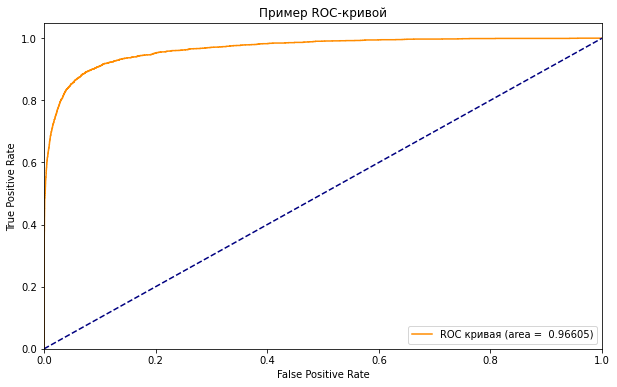

In [16]:
pred_lr = model_lr.predict(X_val)
pred_proba_lr = model_lr.predict_proba(X_val)[:, 1]

roc_auc_score_lr = roc_auc_score(y_val, pred_proba_lr)
f1_score_lr = f1_score(y_val, pred_lr)

print(f'ROC-AUC на валидационной выборке: {roc_auc_score_lr:.5f}')
print(f'F1-score на валидационной выборке: {f1_score_lr:.5f}')
    
make_roc_auc_curve(y_val, pred_proba_lr)

### Модель случайного леса

In [17]:
# %%time
# model_rf = RandomForestClassifier(random_state=RANDOM_SEED)

# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': ['balanced']
# }

# grid_search_rf = RandomizedSearchCV(estimator=model_rf,
#                                     param_distributions=params,
#                                     n_iter=10,
#                                     scoring='f1',
#                                     cv=CV)
# grid_search_rf.fit(X_train, y_train)

# print("Лучшие гиперпараметры:", grid_search_rf.best_params_)
# print("Лучшая точность модели:", grid_search_rf.best_score_)

# Лучшие гиперпараметры: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15, 'class_weight': 'balanced'}
# Лучшая точность модели: 0.3885422639406844
# CPU times: user 12min 43s, sys: 1.06 s, total: 12min 44s
# Wall time: 12min 44s

In [18]:
%%time
params = {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 15, 'class_weight': 'balanced'}
model_rf = RandomForestClassifier(n_estimators=params['n_estimators'],
                                  min_samples_split=params['min_samples_split'],
                                  min_samples_leaf=params['min_samples_leaf'],
                                  max_depth=params['max_depth'],
                                  class_weight=params['class_weight'],
                                  random_state=RANDOM_SEED)
model_rf.fit(X_train, y_train)

CPU times: user 9.05 s, sys: 38.5 ms, total: 9.09 s
Wall time: 9.09 s


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200,
                       random_state=RandomState(MT19937) at 0x7FAA4F617740)

ROC-AUC на валидационной выборке: 0.89202
F1-score на валидационной выборке: 0.38275


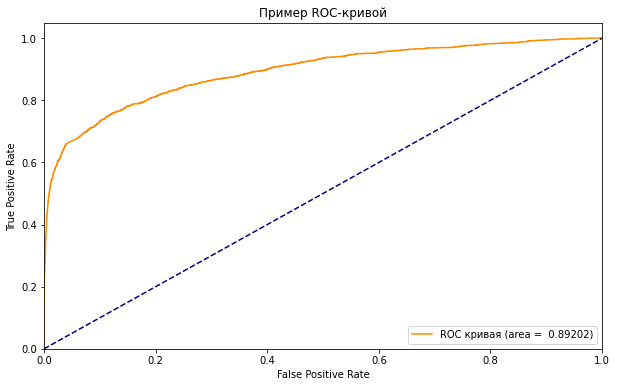

In [19]:
pred_rf = model_rf.predict(X_val)
pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]

roc_auc_score_rf = roc_auc_score(y_val, pred_proba_rf)
f1_score_rf = f1_score(y_val, pred_rf)

print(f'ROC-AUC на валидационной выборке: {roc_auc_score_rf:.5f}')
print(f'F1-score на валидационной выборке: {f1_score_rf:.5f}')
    
make_roc_auc_curve(y_val, pred_proba_rf)

### Модель CatBoost

In [20]:
# %%time
# params = {'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 4, 'auto_class_weights': 'Balanced'}


# model_catboost = CatBoostClassifier(iterations=params['iterations'],
#                                     depth=params['depth'],
#                                     l2_leaf_reg=params['l2_leaf_reg'],
#                                     auto_class_weights=params['auto_class_weights'],
#                                     eval_metric='TotalF1',
#                                     verbose=50,
#                                     random_state=150797)
# model_catboost.fit(X_train, y_train)

In [21]:
# pred_catboost = model_catboost.predict(X_val)
# pred_proba_catboost = model_catboost.predict_proba(X_val)[:, 1]

# roc_auc_score_catboost = roc_auc_score(y_val, pred_proba_catboost)
# f1_score_catboost = f1_score(y_val, pred_catboost)

# print(f'ROC-AUC на валидационной выборке: {roc_auc_score_catboost:.5f}')
# print(f'F1-score на валидационной выборке: {f1_score_catboost:.5f}')
    
# make_roc_auc_curve(y_val, pred_proba_catboost)

In [22]:
## модель обучается около 20 минут и показывает на валидации 0.724 f-score и 0.94891 roc-auc

В данном разделе были построены модели: логистическая регрессия, случайный лес и модель CatBoost. Наилучший результат метрики f1_score показала модель логистической регрессии. Используем ее далее при тестировании.

### Тестирование 

ROC-AUC на валидационной выборке: 0.96681
F1-score на валидационной выборке: 0.75325


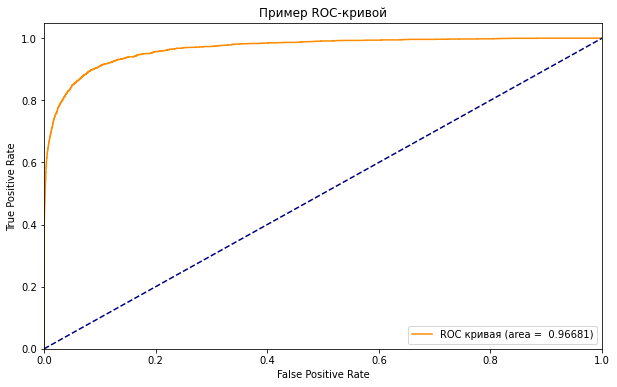

In [23]:
pred_test_lr = model_lr.predict(X_test)
pred_proba_test_lr = model_lr.predict_proba(X_test)[:, 1]

roc_auc_score_test_lr = roc_auc_score(y_test, pred_proba_test_lr)
f1_score_test_lr = f1_score(y_test, pred_test_lr)

print(f'ROC-AUC на валидационной выборке: {roc_auc_score_test_lr:.5f}')
print(f'F1-score на валидационной выборке: {f1_score_test_lr:.5f}')
    
make_roc_auc_curve(y_test, pred_proba_test_lr)

На тестировании модель показала значение F1-score > 0,75. Данное значение удовлетворяет условиям проекта.

## Общий вывод

В ходе проекта были выполнены следующий шаги:

Загрузали данные и в дальнейшем провели их предварительную обработку. Этот процесс включал удаление лишних символов, токенизацию текста и приведение его к нижнему регистру. Затем мы разделили данные на обучающую, тестовую и валидационную выборки.

Для достижения намеченной цели мы построили различные алгоритмы машинного обучения, включая логистическую регрессию, случайный лес и модель catboost. Важным аспектом было использование оптимальных гиперпараметров для каждой модели. Однако основное требование заключалось в достижении метрики качества F1 не менее 0.75. 

После обучения различных моделей мы тщательно оценили их производительность на тестовой выборке. По результатам анализа была выбрана модель логистической регрессии (f1-score = 0.76 на тестовой выборке). Мы собираемся применить эту модель для классификации комментариев в реальном времени. Она сможет обнаруживать токсичные комментарии и отправлять их на модерацию, чтобы обеспечить безопасность и качество описаний товаров в интернет-магазине «Викишоп».